### Machine learning: Model forecasting
##### Business goal: Predict future temperature using TimeSplitSeries
##### Data set: ECAD temperature data from Berlin-Tempelhof

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
from statsmodels.tsa import stattools
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
plt.rcParams['figure.figsize'] = (12, 6)

In [33]:
# import data as df
df =  pd.read_csv('../data/temp_modified.csv', index_col=0, parse_dates=True)

In [ ]:
df['year']= df.index.year
df['timestep'] = range(len(df)) # add column named "timestep" with the lenght of the dataframe df
df

In [ ]:
df.index.month

In [ ]:
# convert categorical variables into dummy/indicator variables
seasonal_dummies = pd.get_dummies(df.index.month, prefix='month', drop_first=True).set_index(df.index)
df = df.join(seasonal_dummies)

In [ ]:
X = df.drop(['temperature'], axis=1)
y = df['temperature']

In [ ]:
m = LinearRegression()
m.fit(X, y)

In [ ]:
# calculate remainder
df['trend_seasonal'] = m.predict(X)
df['differences'] = df['temperature'] - df['trend_seasonal']

## Using TimeSeriesSplit

<AxesSubplot:xlabel='date', ylabel='differences'>

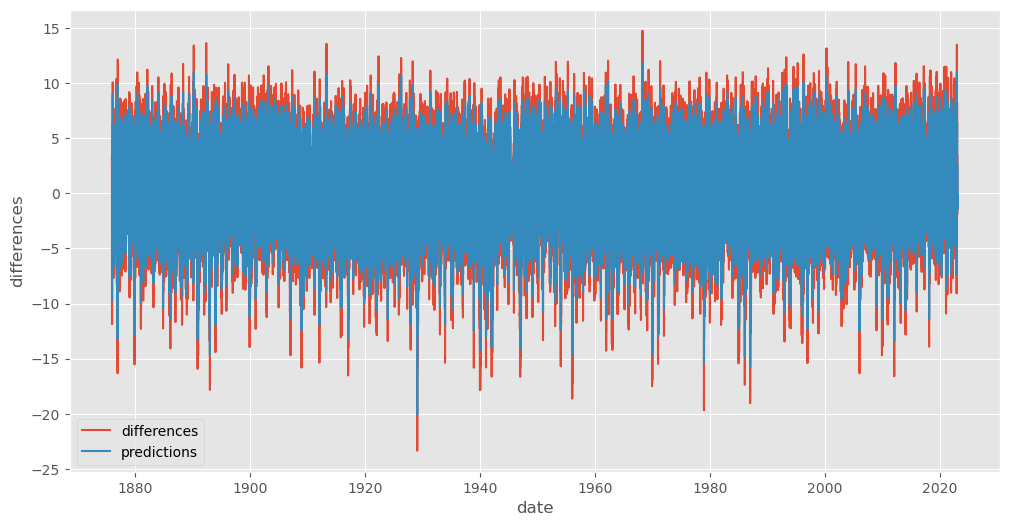

In [37]:
sns.lineplot(data=df['differences'],label = 'differences')
sns.lineplot(data=ar_model.predict(),label = 'predictions')

In [ ]:
selected_order = ar_select_order(df['differences'], maxlag=12)
# finding the number of lags to use
selected_order.ar_lags

In [38]:
df['lag1'] = df['differences'].shift(1)
df['lag2'] = df['differences'].shift(2)
df['lag3'] = df['differences'].shift(3)
df['lag4'] = df['differences'].shift(4)
df['lag5'] = df['differences'].shift(5)

In [39]:
df.dropna(inplace=True)
X_full = df.drop(['temperature', 'trend_seasonal', 'differences'], axis=1)
y_full = df['temperature']

In [40]:
m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression()

In [41]:
# TimeSeriesSplit = Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets:
ts_split = TimeSeriesSplit(n_splits=5)

In [42]:
# for loop to see the splits:
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    print(f'The training data for the {i+1}th iteration are the observations {train_index[0]} to {train_index[-1]}')
    print(f'The validation data for the {i+1}th iteration are the observations {validation_index[0]} to {validation_index[-1]}')
    print()

The training data for the 1th iteration are the observations 0 to 8956
The validation data for the 1th iteration are the observations 8957 to 17908

The training data for the 2th iteration are the observations 0 to 17908
The validation data for the 2th iteration are the observations 17909 to 26860

The training data for the 3th iteration are the observations 0 to 26860
The validation data for the 3th iteration are the observations 26861 to 35812

The training data for the 4th iteration are the observations 0 to 35812
The validation data for the 4th iteration are the observations 35813 to 44764

The training data for the 5th iteration are the observations 0 to 44764
The validation data for the 5th iteration are the observations 44765 to 53716



In [43]:
time_series_split = ts_split.split(X_full, y_full)
result = cross_val_score(estimator=m_full, X=X_full, y=y_full, cv=time_series_split)

In [44]:
timestep = df['timestep'].max() + 1

In [46]:
months = [0] * 11

In [50]:
months[0] = 1
lag1 = df.loc['2023-01-31', 'differences']
lag2 = df.loc['2023-01-30', 'differences']
lag3 = df.loc['2023-01-29','differences']
lag4 = df.loc['2023-01-28','differences']
lag5 = df.loc['2023-01-27','differences']

In [51]:
# create a future data point
X_future1 = []
X_future1.append(0)
X_future1.append(2023)
X_future1.append(timestep)
X_future1.extend(months)
X_future1.append(lag1)
X_future1.append(lag2)
X_future1.append(lag3)
X_future1.append(lag4)
X_future1.append(lag5)

In [56]:
# create a new data frame
X_future1 = pd.DataFrame([X_future1], columns = X_full.columns)
X_future1

ValueError: Must pass 2-d input. shape=(1, 1, 19)

In [53]:
m_full.predict(X_future1)

array([4.53437504])